<a href="https://colab.research.google.com/github/TomasRipsky/Ai-Collab/blob/Mushrooms_Detection_With_Yolo/YoloTaskRipsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALATION PROCESS


In [ ]:
#HERE WE INSTALL THE NECESARY LIBRARIES TO BE ABLE TO CREATE AND TRAIN THE SISTEM
!pip uninstall torchtext torchaudio
!pip install torch==1.13.0
!pip install torchvision==0.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt gradio # install dependencies

In [ ]:
#HERE WE CLONE THE YOLOv5
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


# TRAINING PROCESS


In [ ]:
#WE PROCEED TO MOUNT OUR GOOGLE DRIVE TO BE ABLE TO ACCESS TO THE FOLDER CONTAINING THE TEST AND TRAIN IMAGES
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/mushrooms
%cat /content/drive/MyDrive/Colab_Notebooks/mushrooms/data.yaml


/content/drive/MyDrive/Colab_Notebooks/mushrooms
train: ../train/images
val: ../valid/images

nc: 2
names: ['CoW', 'chanterelle']

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
%pip install -qr requirements.txt # install dependencies

In [ ]:
#WE ESTABLISH THE ENVIROMENT, ADDING THE LOCATION OF THE DATASET
import os
os.environ["DATASET_DIRECTORY"] = "/content/drive/MyDrive/Colab_Notebooks/mushrooms"

## First training process.

This is the first time that we train the model, we use the images from the data set and some epochs.

In [ ]:
!python train.py --img 416 --batch 16 --epochs 1 --data /content/drive/MyDrive/Colab_Notebooks/mushrooms/data1.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Colab_Notebooks/mushrooms/data1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

Here we proceed to train the network again but now using the best weights found by one of the previous training process ( this process was done using 100 epochs and we downloaded as a .zip in order to use it now)

In [ ]:
!python train.py --img 416 --batch 16 --epochs 10 --data /content/drive/MyDrive/Colab_Notebooks/mushrooms/data1.yaml --weights /content/yolov5/runs/train/exp1/weights/best.pt --cache

train: weights=/content/yolov5/runs/train/exp1/weights/best.pt, cfg=, data=/content/drive/MyDrive/Colab_Notebooks/mushrooms/data1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

Here we again training the network using the best training weights founded ( know we have multiple training process with 100, and 10 epochs)

In [ ]:
!python train.py --img 416 --batch 16 --epochs 10 --data /content/drive/MyDrive/Colab_Notebooks/mushrooms/data1.yaml --weights /content/yolov5/runs/train/exp2/weights/best.pt --cache

train: weights=/content/yolov5/runs/train/exp2/weights/best.pt, cfg=, data=/content/drive/MyDrive/Colab_Notebooks/mushrooms/data1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

# INFERENCE PROCESS

Here we are using the model after training it to make inferences about what kind of mushrooms the image is showing

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --img 416 --conf 0.1 --source /content/drive/MyDrive/Colab_Notebooks/mushrooms/test/images

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/Colab_Notebooks/mushrooms/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/drive/MyDrive/Colab_Notebooks/mushrooms/test/images/chanterelle_02_jpg.rf.f7a48494b7393c532f641585d99a57be.jpg: 416x416 3 chanterelles, 204.0ms
image 2/5 /content/drive/MyDrive/Colab_Notebooks/mushrooms/test/images/chanterelle_03_jpg.rf.580f8d787af6a8050c21c065bf016f20.jpg: 416x416 2 chanterell

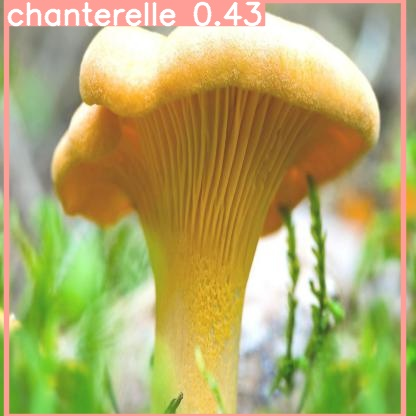

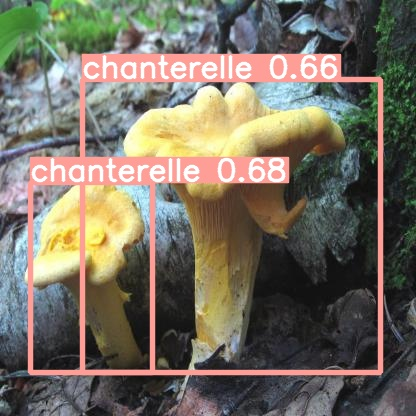

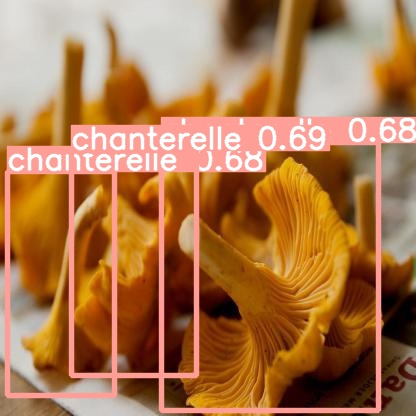

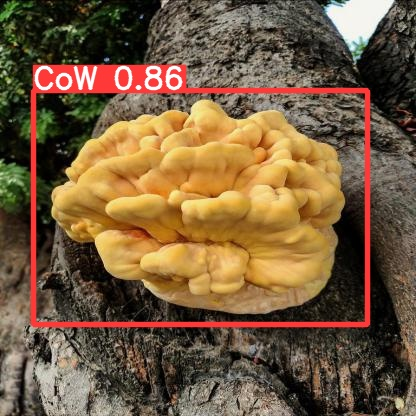

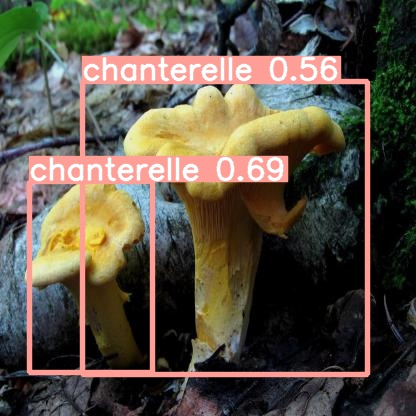

In [ ]:
#DISPLAYING THE IMAGES WITH THE INFERED RESULTS
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))

# SHOW THROUGH WEB


In [ ]:
import gradio as gr
import torch
from PIL import Image

# Images
torch.hub.download_url_to_file("https://media.istockphoto.com/id/133823186/photo/two-yellow-chantarelles.jpg?s=612x612&w=0&k=20&c=APDUdDiXKhD9g5l-6IVLYcZLSVuCcyZ9wUB2KxnLihs=","chanterelle.jpg")
torch.hub.download_url_to_file("https://i.redd.it/laglj66nucf91.jpg","cow1.jpg")
torch.hub.download_url_to_file("https://images.squarespace-cdn.com/content/v1/544721fce4b065964dbc566b/1578942747721-VRIKJI5L3TYGTWW2S2PV/unnamed.jpg?format=1000w","chanterelle2.jpg")
torch.hub.download_url_to_file("https://s0.geograph.org.uk/geophotos/05/57/94/5579449_7158e271.jpg","cow2.jpg")
torch.hub.download_url_to_file("https://shutterclick.co.uk/wp-content/uploads/2011/04/IMG_6361.jpg","cow3.jpg")

# Model
model = torch.hub.load('.', 'custom', path='/content/yolov5/runs/train/exp3/weights/best.pt', source='local') #To load your custom model

def yolo(im, size=416): #640 original
    g = (size / max(im.size))  # gain
    im = im.resize((int(x * g) for x in im.size), Image.ANTIALIAS)  # resize

    results = model(im)  # inference
    results.render()  # updates results.imgs with boxes and labels
    return Image.fromarray(results.ims[0])


inputs = gr.inputs.Image(type='pil', label="Original Image")
outputs = gr.outputs.Image(type="pil", label="Output Image")

title = "YOLO TASK RIPSKY"

examples = [['chanterelle.jpg'],["cow1.jpg"],['chanterelle2.jpg'],['cow2.jpg'],['cow3.jpg']]
gr.Interface(yolo, inputs, outputs, title=title, examples=examples, analytics_enabled=False).launch(
    debug=True,share = True)

  0%|          | 0.00/67.5k [00:00<?, ?B/s]

  0%|          | 0.00/2.32M [00:00<?, ?B/s]

  0%|          | 0.00/295k [00:00<?, ?B/s]

  0%|          | 0.00/132k [00:00<?, ?B/s]

  0%|          | 0.00/117k [00:00<?, ?B/s]

YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://12006af449b314e9.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


# TEORICAL PART

## Backpropagation Algorithm.

This algorithm is one of the most important building blocks in a neural network. It first appear in the 60s.

Simply defininig it, this consists in that after each forward pass through a network, backpropagation performs a backward pass while adjusting the models parameters.(3)

**HOW DOES EACH STEP WORKS ?**

In the **forward pass**, we start by propagating the data inputs to the input layer, go through the hidden layers, measure the network’s predictions from the output layer, and finally calculate the network error based on the predictions the network made.(2)

In the **backward pass**, the flow is reversed so that we start by propagating the error to the output layer until reaching the input layer passing through the hidden layer(s). The process of propagating the network error from the output layer to the input layer is called backward propagation, or simple backpropagation. The backpropagation algorithm is the set of steps used to update network weights to reduce the network error.(2)

**PARTS OF THE NETWORK.**

1.   **Input layer** -> it is the first layer, it is directly connected to the network inputs, it can be only ONE input layer.(2)
2.   **Hidden layer** -> layer or layers located between the input and the output layer, here we apply weights to the input to direct them through an activation function and finally to the output.(1)
3.   **Output layer** -> Final layer that returns the result obtained by the network, it can be only ONE output layer.(2)

**OVERVIEW OF ITS ARCHITECTURE**

Simplifying it the architecture consists of sequential layers, where each layer is connected to the following one.
Each layer consist of 1 or more neurons, as this kind of network are fully-connected, each neuron in layer i is connected with all neurons in layer i+1.
For each connection we have an associated weight (floating-point number), that measures the importance of the connection between neurons.
This number are learnable, and with this ones the networks makes predictions, the better the weights the better the predictions, the weights should be updated to reduce the error.


**WHY WE USE BACKPROPAGATION ALGORITHM?**(2)

At the end of each forward pass the error is calculated, if it is high this means that the nework didnt learn properly from the data. It means that the weights arent accurate enough, so we should update them.

This algorithm is responsible for updating the network weights with the objective of reducing the network error.

**HOW DOES THE ALGORITHM WORKS AND THE PROBLEM OF MINIMUMS**(4)

Backpropagation computes the gradient in weight space of a feedforward neural network, with respect to a loss function.
Backpropagation computes the gradient for a fixed input–output pair where the weights can vary. This process can be computed by the chain rule. When a network has converged on the global minimum, it has optimized its ability to classify the training data, and in theory, this is the fundamental goal of training: to continue modifying weights until the global minimum has been reached.

**Whats the problem ?** (5 and 4)

Finding this global minimum can be difficult, and here is when the local minimum problem appears.
Gradient descent relies on local information that will, we hope, lead a network toward the global minimum. The network has no prior knowledge about the characteristics of the overall error surface, and consequently when it reaches a point that seems like the bottom of the error surface based on local information, it cannot pull out a topographical map and determine that it needs to go back uphill in order to find the point that is actually lower than all others.
It is reasonable to assume that the global minimum represents the optimal solution, and to conclude that local minima are problematic because training might “stall” in a local minimum rather than continuing toward the global minimum.

**Example** (6)

How quickly would a medicine be absorbed by your system can be modeled and analyzed using calculus.
In a case with such a sensitive information the difference between an optimal solution (global minimum) or not (local minimum) could be crucial at the time of consider using or not the model to make inferences that can affect someone in the "real world".


(LINK TO REFERENCES BELOW)

## Yolov5.

**WHAT IS YOLOv5??**

YOLO an acronym for 'You only look once', is an object detection algorithm that divides images into a grid system. Each cell in the grid is responsible for detecting objects within itself.

YOLO is one of the most famous object detection algorithms due to its speed and accuracy.(1)

**HOW DOES IT WORK ?**

YOLO is a novel convolutional neural network (CNN) that detects objects in real-time with great accuracy. This approach uses a single neural network to process the entire picture, then separates it into parts and predicts bounding boxes and probabilities for each component.
These bounding boxes are weighted by the expected probability.

**OVERVIEW OF ITS ARCHITECTURE**(3 and 2)

Yolo consists of three parts:
1.   **BACKBONE** -> Is a model used to extract the key features of an input image.
2.   **NECK** -> Is a model used to create feature pyramids. Feature pyramids aid models in generalizing successfully when it comes to object scaling. It aids in the identification of the same object in various sizes and scales.Feature pyramids are very useful and help models to perform well on unseen data.
3. **HEAD** -> Is the model responsible for the final detection step.

**ACTIVATION FUNCTION** (3)

The choice of activation functions is most crucial in any deep neural network.
YOLO v5 authors decided to go with the Leaky ReLU and Sigmoid activation function.
In YOLO v5 the Leaky ReLU activation function is used in middle/hidden layers and the sigmoid activation function is used in the final detection layer.

**OPTIMIZATION FUNCTION** (3)

We have two options here:
1. SGD
2. ADAM

**LOSS FUNCTION** (3)

In the YOLO family, there is a compound loss is calculated based on objectness score, class probability score, and bounding box regression score.

Ultralytics have used Binary Cross-Entropy with Logits Loss function from PyTorch for loss calculation of class probability and object score.

We also have an option to choose the Focal Loss function to calculate the loss.

**MODEL SUMMARY** (3)

Model Summary: 191 layers, 7.46816e+06 parameters, 7.46816e+06 gradients


**HOW MUST THE DATASET BE IN ORDER TO BE USEFULL FOR THE YOLO MODEL** (4)

Training your own YOLO model means that you will need to provide a labeled dataset.
To train your YOLO model with the dataset that you created, you need to specify the class names and the number of classes, as well as a file listing URLs to all of the images that you'll use for training.


(LINK TO REFERENCES BELOW)

## REFERENCES


Backpropagation:
1.   https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning
2.   https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide
3. https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd
4. https://en.wikipedia.org/wiki/Backpropagation
5. https://www.allaboutcircuits.com/technical-articles/understanding-local-minima-in-neural-network-training/
6. https://medium.com/@dilip.voleti/maxima-vs-minima-and-global-vs-local-in-machine-learning-basic-concept-741e760e9f80

YOLOv5:
1.   https://docs.ultralytics.com/
2.   https://www.analyticsvidhya.com/blog/2021/12/how-to-use-yolo-v5-object-detection-algorithm-for-custom-object-detection-an-example-use-case/#:~:text=It%20is%20a%20novel%20convolutional,and%20probabilities%20for%20each%20component.
3. https://towardsai.net/p/computer-vision/yolo-v5%E2%80%8A-%E2%80%8Aexplained-and-demystified
4. https://labelstud.io/blog/quickly-create-datasets-for-training-yolo-object-detection-with-label-studio/





